In [2]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DS_US = df[(df['job_title_short'].str.contains('Data Scientist', case=False, na=False)) & (df['job_country'] == 'United States')] .copy()

df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])
df_DS_US['salary_year_avg'].sample(10)

558883    107789.5
744385     99000.0
677376    162623.5
740800    173000.0
248679     90000.0
271288     90000.0
136889    125000.0
242160    115000.0
489555    127000.0
715083    128816.0
Name: salary_year_avg, dtype: float64

(0.0, 400000.0)

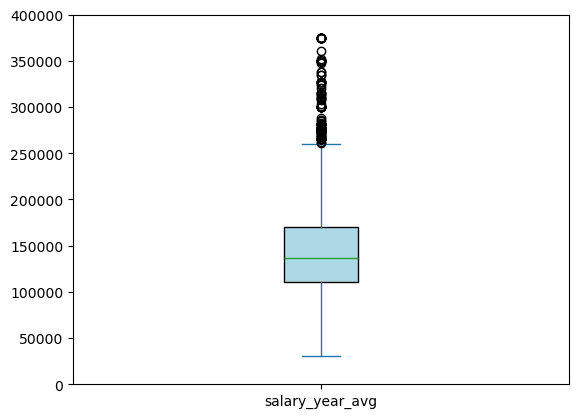

In [4]:
df_DS_US['salary_year_avg'].plot(kind='box', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylim(0, 400_000)

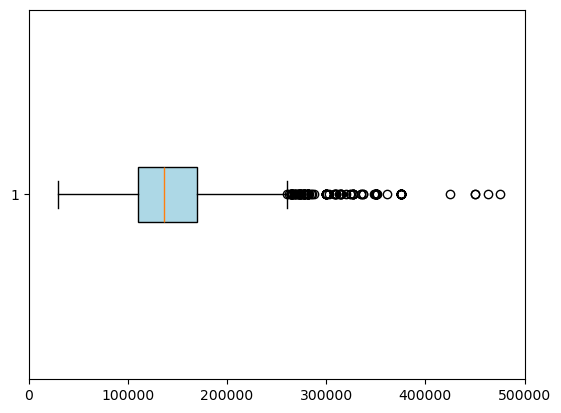

In [4]:
plt.boxplot(df_DS_US['salary_year_avg'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlim(0, 500000)
plt.show()

In [5]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']
df_US = df[df['job_title_short'].str.contains('|'.join(job_titles), case=False, na=False) & (df['job_country'] == 'United States')].copy()

In [6]:
df_US['job_title_short'].value_counts()

job_title_short
Data Analyst             67816
Data Scientist           58830
Data Engineer            35080
Senior Data Scientist    12946
Senior Data Analyst      11791
Senior Data Engineer      9289
Name: count, dtype: int64

C:\Users\OKKKKK\AppData\Local\Temp\ipykernel_18164\2759077020.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),medianprops=dict(color='grey', linewidth=1),labels=job_titles)


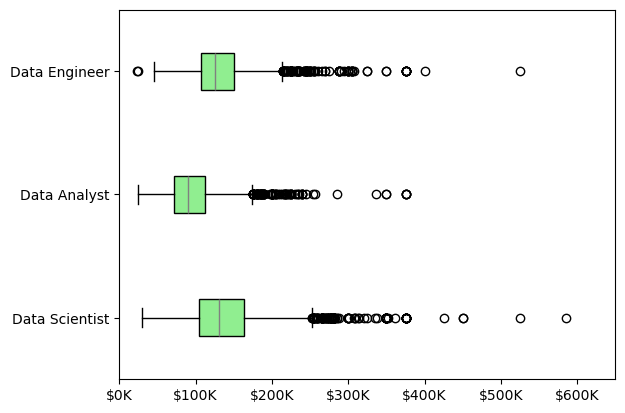

In [5]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']
df_US_2 = df[df['job_title_short'].isin(job_titles) & (df['job_country'] == 'United States')].copy()
df_US_2 = df_US_2.dropna(subset=['salary_year_avg'])

job_list = [df_US_2[df_US_2['job_title_short'] == title]['salary_year_avg'] for title in job_titles]
plt.boxplot(job_list, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),medianprops=dict(color='grey', linewidth=1),labels=job_titles)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 650000)
plt.show()

In [8]:
df_US_2['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

C:\Users\OKKKKK\AppData\Local\Temp\ipykernel_16544\528136935.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, vert=False, labels=job_titles)


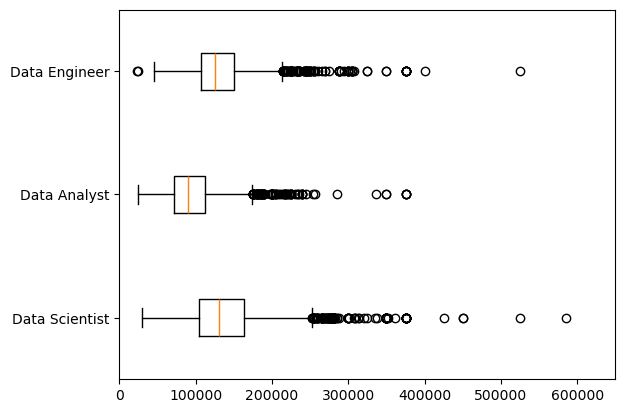

In [9]:
plt.boxplot(job_list, vert=False, labels=job_titles)
plt.xlim(0, 650000)
plt.show()

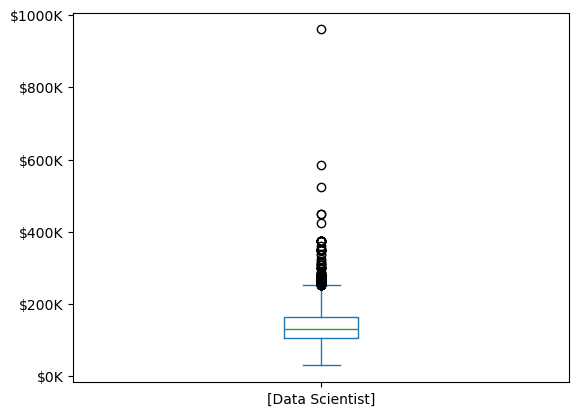

In [86]:
job_list[0].plot(kind='box',label=['Data Scientist'])
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

In [11]:
x = [1, 2, 3, 4, 5]
x = [i * 2 for i in x]
for _ in x:
    print(_)

2
4
6
8
10


In [12]:
numbers = [1, 2, 3]
squares = []
for n in numbers:
    squares.append(n**2)

print(squares)   # [1, 4, 9]


[1, 4, 9]


In [13]:
squares = [n**2 for n in numbers]
print(squares)   # [1, 4, 9]


[1, 4, 9]


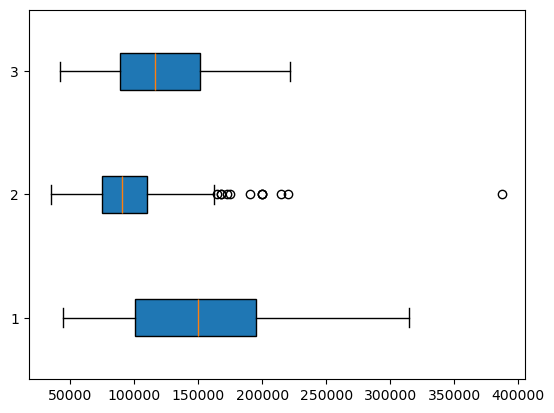

In [27]:
titles = ['Machine Learning Engineer', 'Business Analyst', 'Cloud Engineer']

df_tt = df[df['job_title_short'].isin(titles) & (df['job_country'] == 'United States')].copy()
df_tt = df_tt.dropna(subset=['salary_year_avg'])

job_list_tt = [df_tt[df_tt['job_title_short'] == title]['salary_year_avg'] for title in titles]
plt.boxplot(job_list_tt, vert=False, patch_artist=True)
plt.show()

In [25]:
(df[df['job_title_short']=='Cloud Engineer']['salary_year_avg'].median())

90000.0

C:\Users\OKKKKK\AppData\Local\Temp\ipykernel_16544\2108635817.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(lists, vert=False, labels = titles2, patch_artist=True, boxprops=dict(facecolor='lightgreen'))


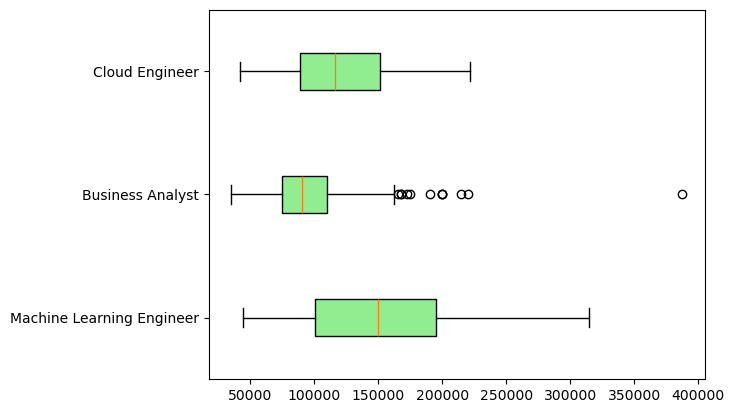

In [58]:
titles2 = ['Machine Learning Engineer', 'Business Analyst', 'Cloud Engineer']
df_ff = df[(df['job_title_short'].isin(titles2)) & (df['job_country']=='United States')].copy()
df_ff = df_ff.dropna(subset=['salary_year_avg'])

lists = [df_ff[df_ff['job_title_short']==title]['salary_year_avg'] for title in titles2]
plt.boxplot(lists, vert=False, labels = titles2, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.show()
